<a href="https://colab.research.google.com/github/roccoasc1/tesi_magistrale/blob/main/Test_with_random_scores_YCAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
!git clone https://github.com/roccoasc1/tesi_magistrale.git

fatal: destination path 'tesi_magistrale' already exists and is not an empty directory.


In [71]:
#adding new path to import my_function module
import sys
sys.path.insert(0,'/content/tesi_magistrale')

N.B.: the installation of Dionysus library (https://mrzv.org/software/dionysus2/) may take time.

In [70]:
!pip install dionysus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
import numpy as np
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt

from collections import defaultdict
from tabulate import tabulate
import random

import dionysus as d # persistence homology library
import my_functions as my

In [127]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

def dendrogram_plot_dis(d_matrix, score_names, title=None, linkage_type = 'average', color_limit=None):
    '''
    This function is a refiniment to our purposies of dendrogram function in scipy.
    Takes in input a matrix 'd_matrix' of dissimilarities between the scores 'score_names'.
    Prints the dendogram rappresenting the hierarchical clustering with 'linkage_type' linkage.
    '''
    _unit = len(d_matrix) //18
    fig, ax = plt.subplots(figsize=(_unit*5, _unit*7))
    dist = squareform(d_matrix)
    linkage_matrix = linkage(dist, linkage_type)
    dendrogram(linkage_matrix, orientation='right',labels=score_names,leaf_font_size=_unit*5, color_threshold=color_limit)
    plt.title(title,fontsize=_unit*6)
    plt.show()

# Scores from Yale-Classical Archives Corpus (https://ycac.yale.edu/)

In [131]:
# importing the csv file with the distribution of all the scores in YCAC
all_dis = pd.read_csv('/content/tesi_magistrale/all_distributions.csv')

#Collect in a dictionary the scores by composer: {'Composer': [('Score Name', [distributions of pitch classes])]}
scores_composers = defaultdict(list)

for _,row in all_dis.iterrows():
    scores_composers[row[0]].append(tuple([row[0]+', '+row[1][:-12], eval(row[2])]))

headers = ["Composer", "#Scores",]
print(tabulate([(comp,len(scores)) for comp, scores in scores_composers.items()], headers=headers))

print(f"\nTotal numer of scores: {sum([len(scores_composers[comp]) for comp in scores_composers])}")

Composer       #Scores
-----------  ---------
Beethoven          372
Scarlatti          554
Byrd                90
Mozart             882
Schubert           222
Chopin             204
Mendelssohn        137
Liszt              125
Tchaikovsky         94
Handel             164
Wagner              39
Vivaldi            167
Debussy             39
Saint-Saens         73
Schumann           167
Bach               639
Haydn              363
Telemann           116

Total numer of scores: 4447


Analysis of $0$-dim diagrams

In [106]:
n0_dim_dgms = {T_name: defaultdict(list) for T,T_name in my.Torus_tonnetz}
for T,T_name in my.Torus_tonnetz:
  for scores in scores_composers.values():
    for s in scores:
        n0_dim_dgms[T_name][len(my.per_diagms(s[1],T, norm=True)[0])].append(tuple([str(s[0]),s[1]]))
  
for _, T_name in my.Torus_tonnetz:
  headers = [f"{T_name}:","#Points", "#Scores",]
  print(tabulate([("",n,len(n0_dim_dgms[T_name][n])) for n in n0_dim_dgms[T_name]], headers=headers,numalign="center"))

C(3,4,5):     #Points    #Scores
-----------  ---------  ---------
                 1        3654
                 2         791
                 3          2
C(1,2,9):     #Points    #Scores
-----------  ---------  ---------
                 2        2914
                 1        1526
                 3          7
C(1,3,8):     #Points    #Scores
-----------  ---------  ---------
                 3        3390
                 2         871
                 1         186
C(1,4,7):     #Points    #Scores
-----------  ---------  ---------
                 1        1729
                 2        2688
                 3         29
                 4          1
C(2,3,7):     #Points    #Scores
-----------  ---------  ---------
                 1        4130
                 2         298
                 3         19


Scores that have 4 points in the 0-dim diagram with C(1,4,7):
1) Liszt, Teleki Laszlo S205 
0-dim diagram: 12.875,inf
0-dim diagram: 19.875,58.08333206176758
0-dim diagram: 25.0,42.375
0-dim diagram: 33.45833206176758,42.375


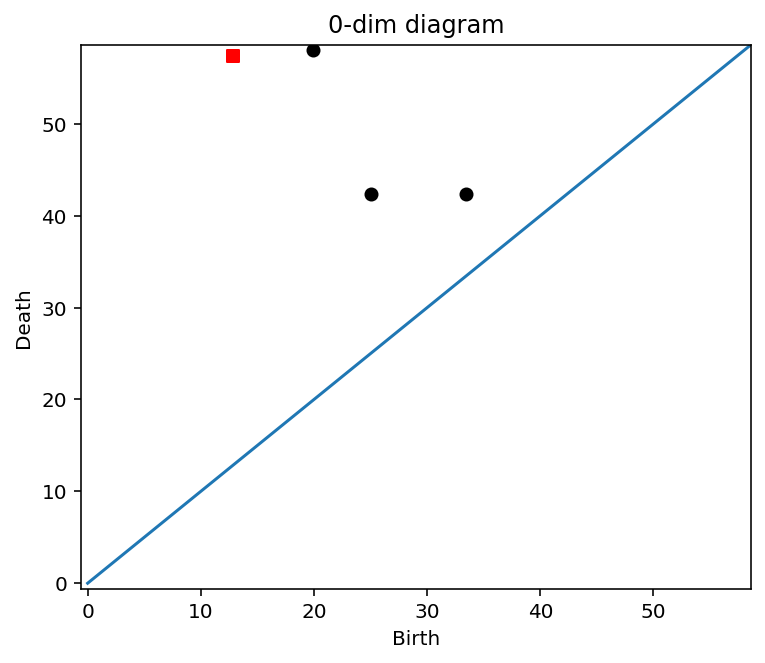

Scores that have 3 points in the 0-dim diagram with C(3,4,5):
1) Beethoven, Preludes Op 39 1
0-dim diagram: 102.625,inf
0-dim diagram: 103.125,103.625
0-dim diagram: 108.0,117.375


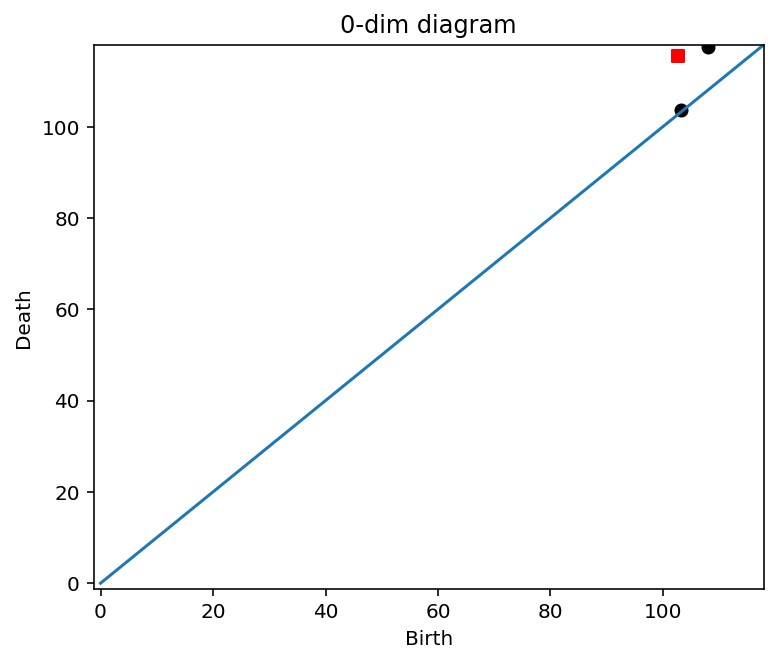

2) Haydn, The Seasons Hob21-3 "Hort, hort das laute Geton" 
0-dim diagram: 55.33333206176758,inf
0-dim diagram: 78.54166412353516,81.70833587646484
0-dim diagram: 81.25,81.70833587646484


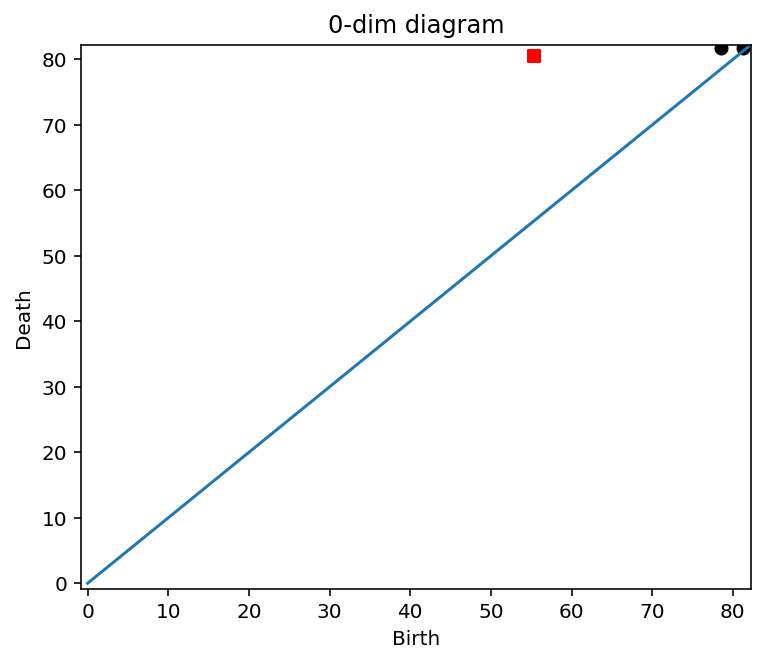

In [110]:
# Some outside cases:
print(f"Scores that have 4 points in the 0-dim diagram with C(1,4,7):")
for i,score in enumerate(n0_dim_dgms['C(1,4,7)'][4]):
  print(f"{i+1}) {score[0]}")
  my.drawAll([my.per_diagms(score[1],my.C(1,4,7))[0]])

print(f"Scores that have 3 points in the 0-dim diagram with C(3,4,5):")
for i,score in enumerate(n0_dim_dgms['C(3,4,5)'][3]):
  print(f"{i+1}) {score[0]}")
  my.drawAll([my.per_diagms(score[1],my.C(3,4,5))[0]])

Analysis of $1$-dim diagrams

In [111]:
n1_dim_dgms = {T_name: defaultdict(list) for T,T_name in my.Torus_tonnetz}
for T,T_name in my.Torus_tonnetz:
  for scores in scores_composers.values():
    for s in scores:
        n1_dim_dgms[T_name][len(my.per_diagms(s[1],T, norm=True)[1])].append(tuple([str(s[0]),s[1]]))

for _, T_name in my.Torus_tonnetz:
  headers = [f"{T_name}:","#Points", "#Scores",]
  print(tabulate([("",n,len(n1_dim_dgms[T_name][n])) for n in n1_dim_dgms[T_name]], headers=headers,numalign="center"))

C(3,4,5):     #Points    #Scores
-----------  ---------  ---------
                 2        4212
                 3         234
                 4          1
C(1,2,9):     #Points    #Scores
-----------  ---------  ---------
                 3        4295
                 2         146
                 4          6
C(1,3,8):     #Points    #Scores
-----------  ---------  ---------
                 4        3203
                 3         968
                 2         276
C(1,4,7):     #Points    #Scores
-----------  ---------  ---------
                 2        3871
                 3         554
                 5          6
                 4         16
C(2,3,7):     #Points    #Scores
-----------  ---------  ---------
                 2        3998
                 3         443
                 4          6


Scores that have 3 points in the 1-dim diagram with C(3,4,5):
1) Debussy, Estampes 100 1
0-dim diagram: 113.875,inf
0-dim diagram: 118.75,inf
0-dim diagram: 163.875,221.0
0-dim diagram: 163.875,192.0


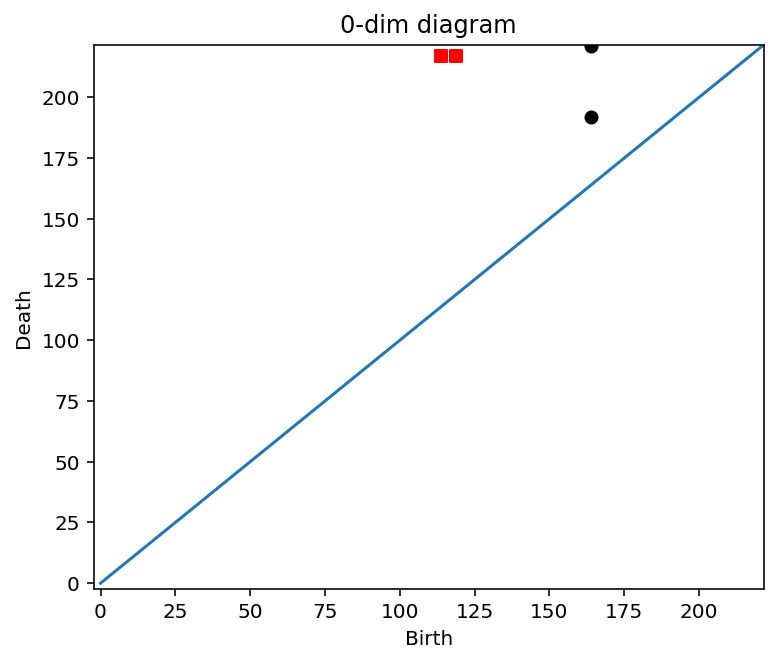

In [114]:
# Some outside cases:
print(f"Scores that have 3 points in the 1-dim diagram with C(3,4,5):")
for i,score in enumerate(n1_dim_dgms['C(3,4,5)'][4]):
  print(f"{i+1}) {score[0]}")
  my.drawAll([my.per_diagms(score[1],my.C(3,4,5))[1]])

## Test with random scores

In [129]:
# Get the number of scores for each composers

class ValueNotInRange(Exception):
    pass

while True:
    try:
        n_scores_for_comp = int(input("Number of scores for each composer (type a natural number between 1 and 4, then press Enter): "))
        if 0<n_scores_for_comp<=4:
            break
        else:
            raise ValueNotInRange     
    except ValueError:
        print("Could not convert data to an integer. Try again!")
    except ValueNotInRange:
        print("Value not in range {1,2,3,4}. Try again!\nMax 4 pieces for each composers to get a good plot of the dendogram")

Number of scores for each composer (type a natural number between 1 and 4, then press Enter): 2


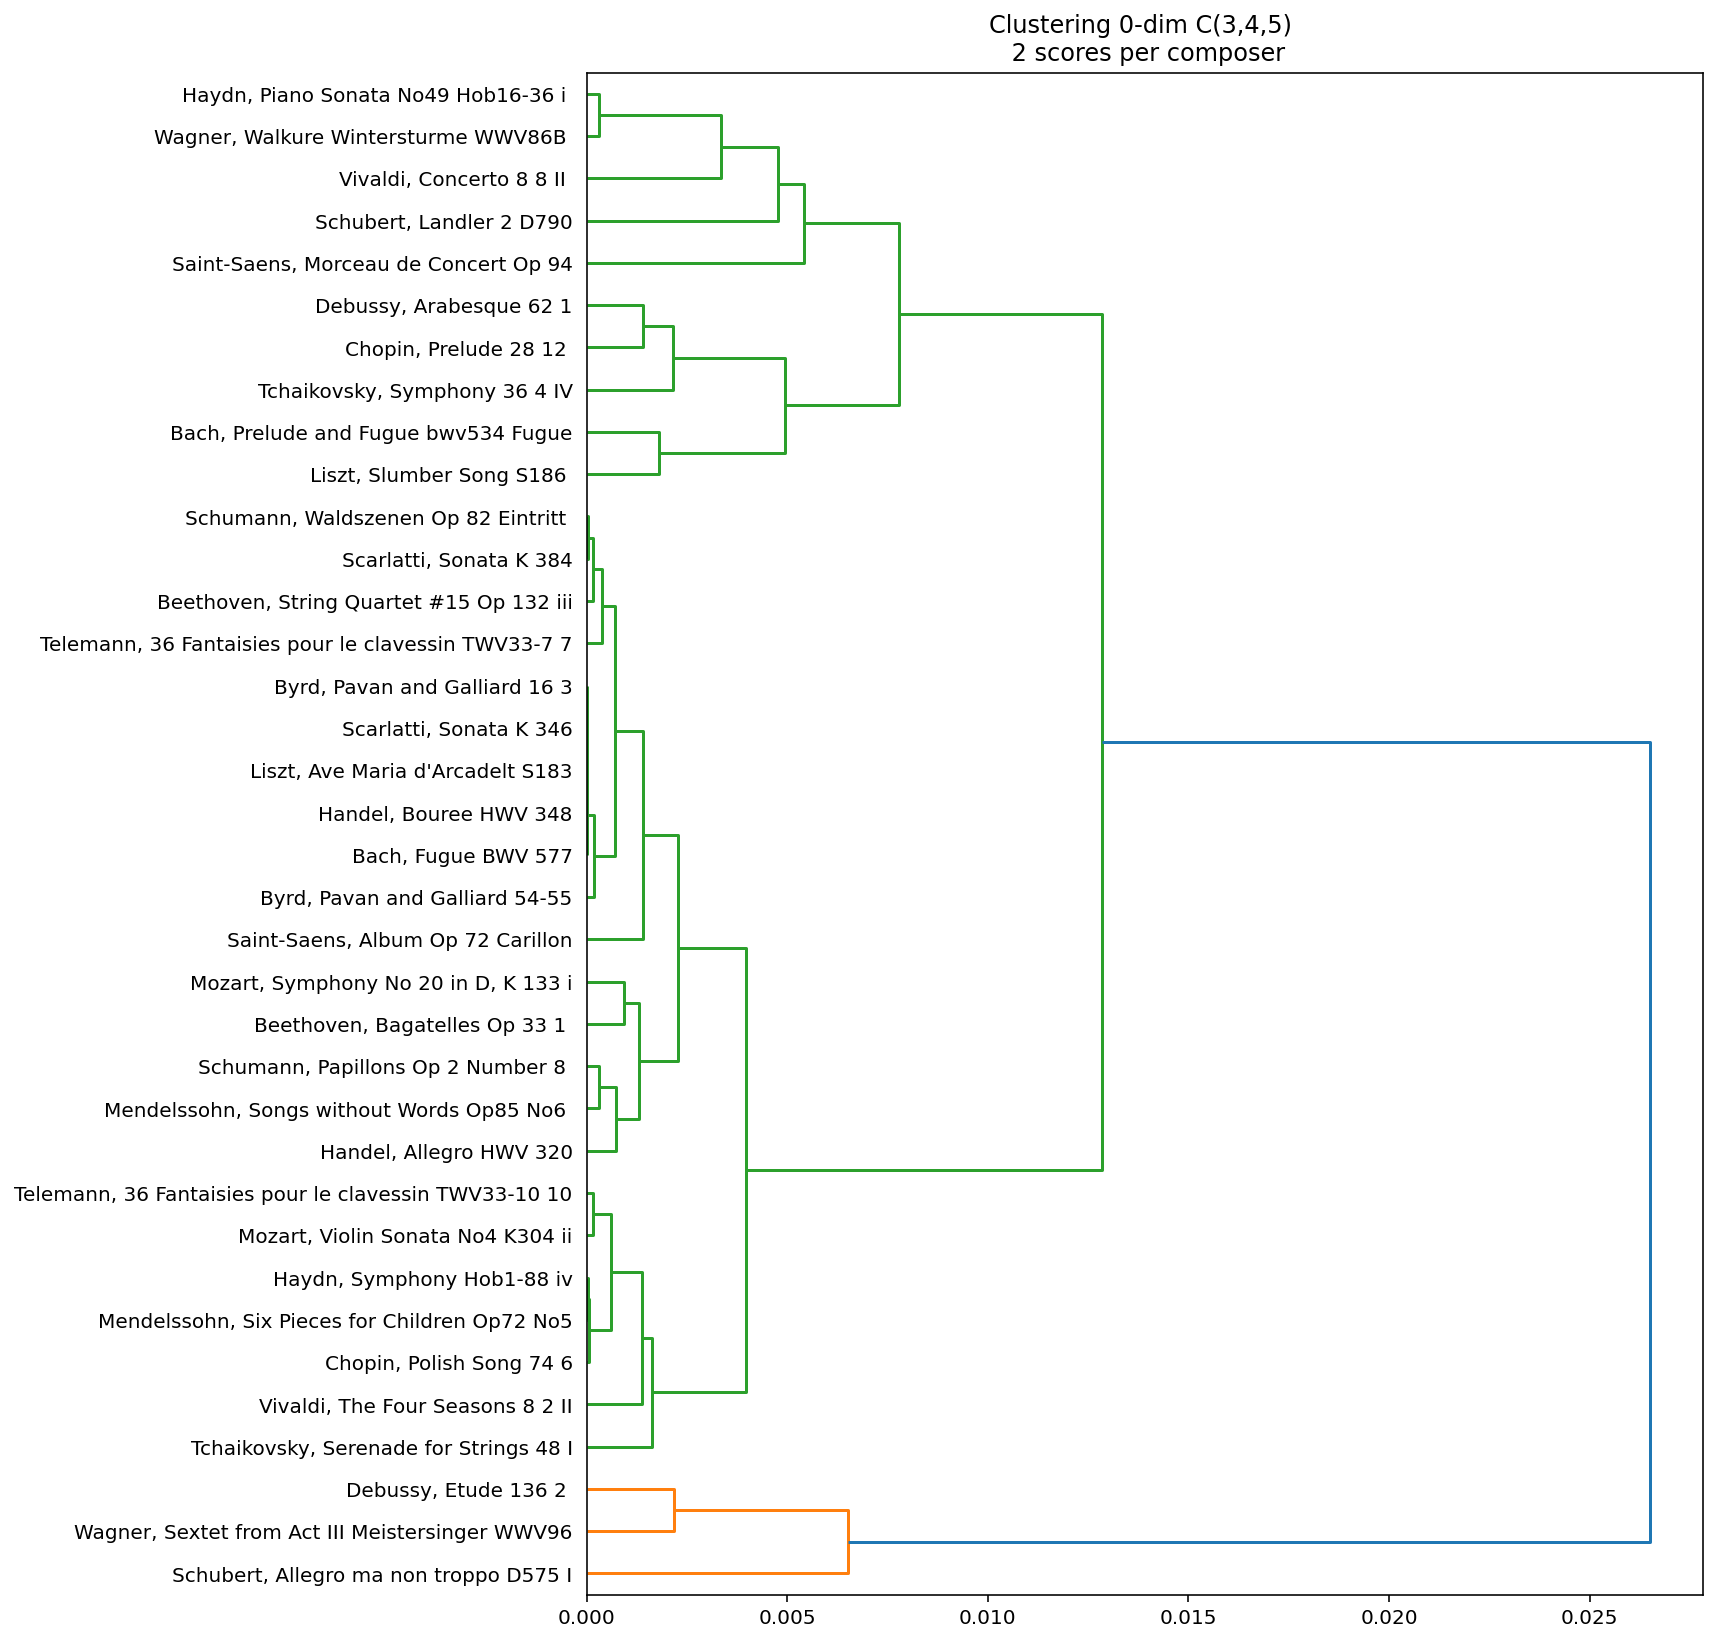

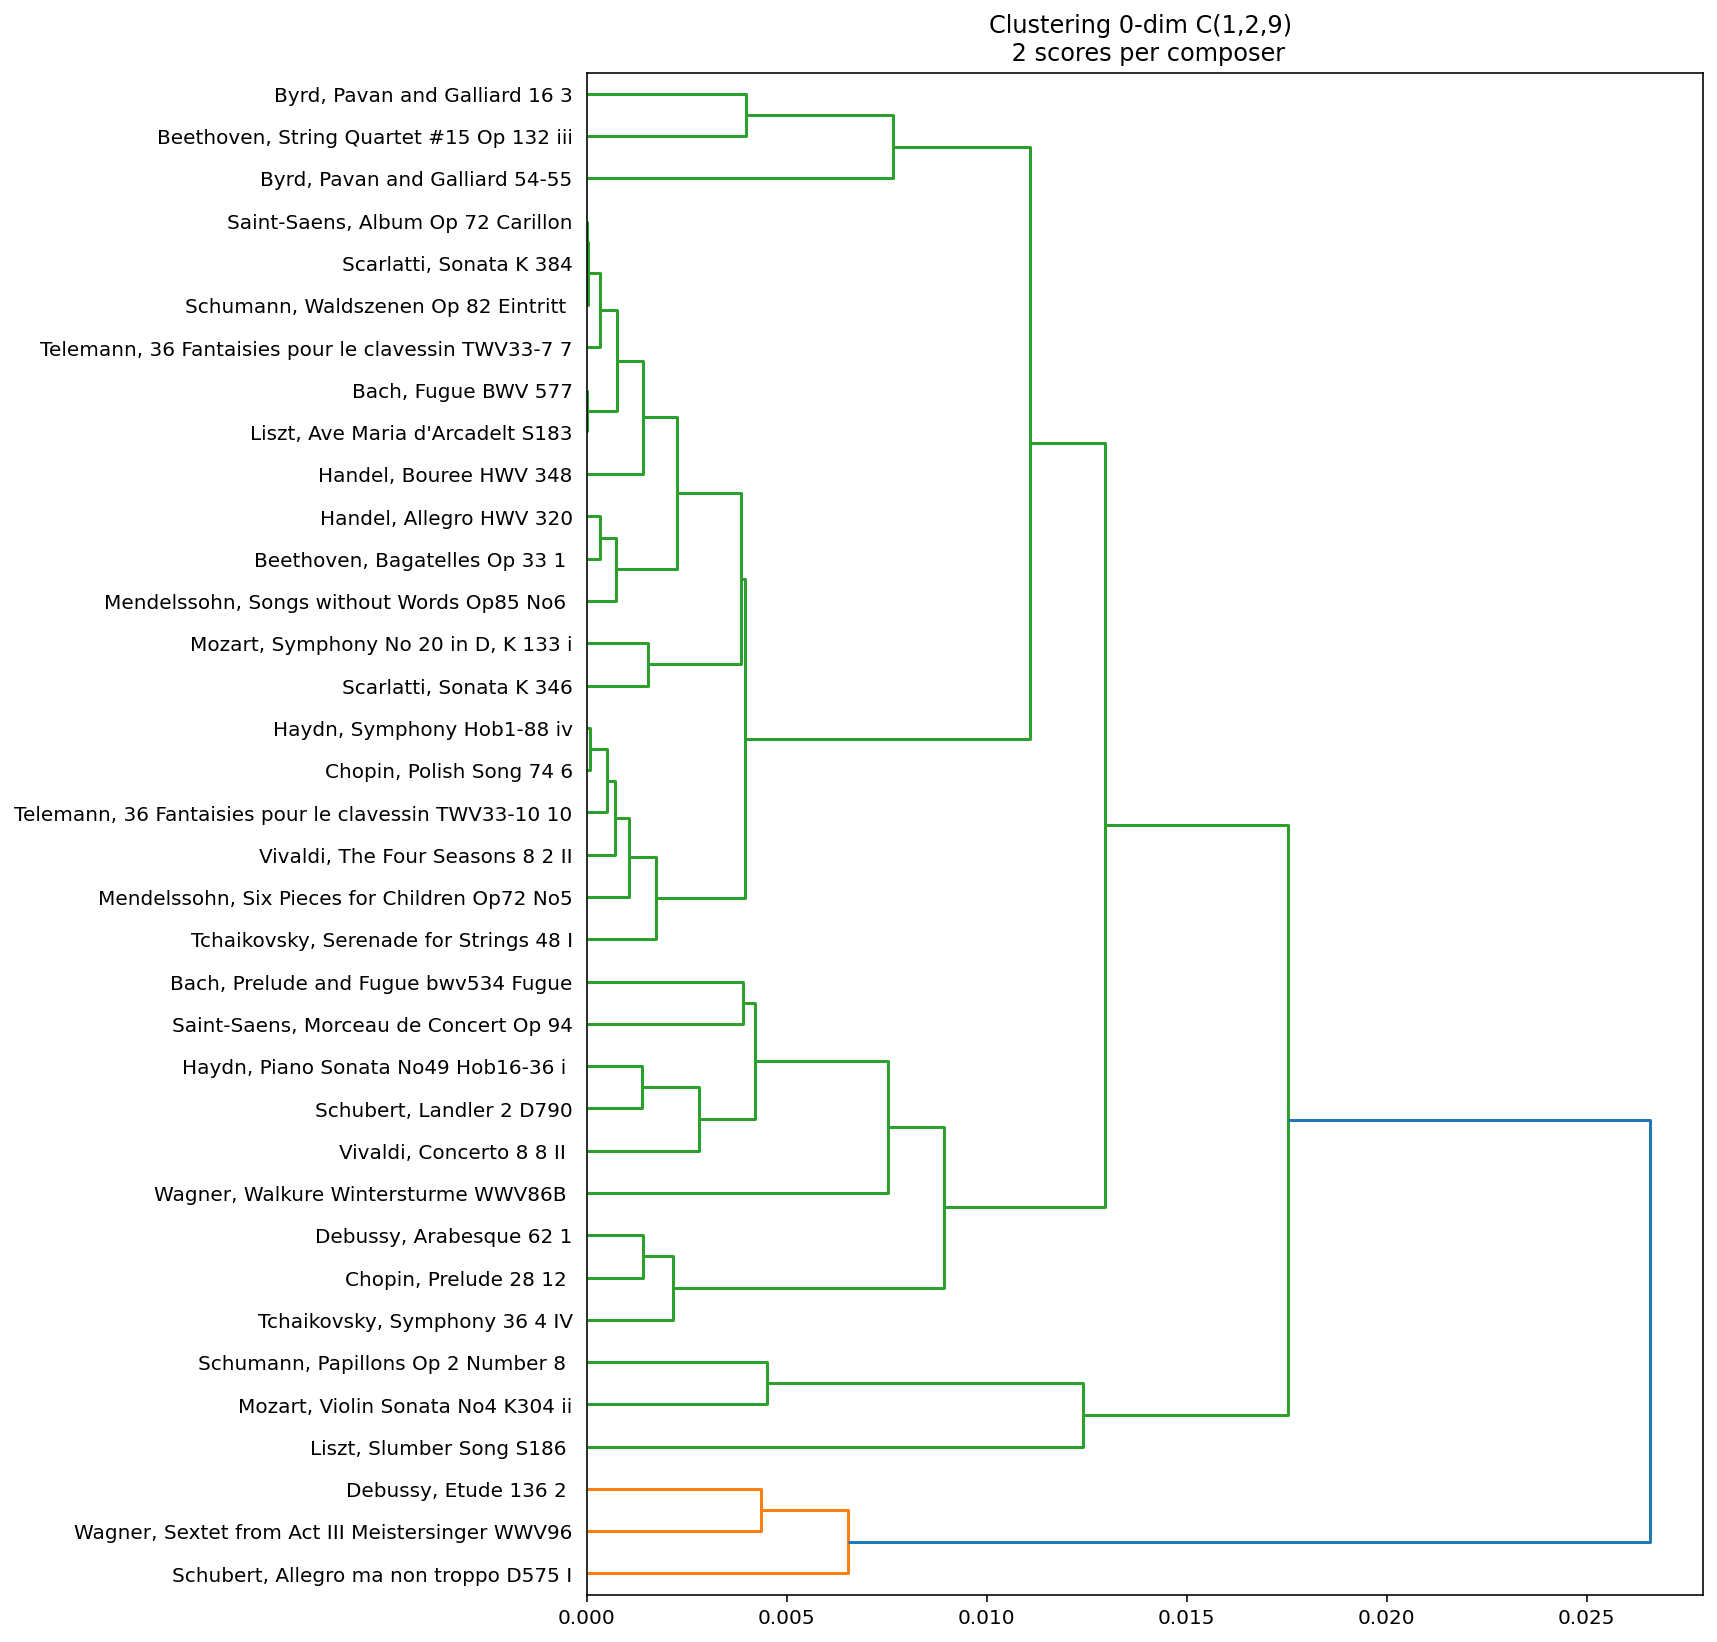

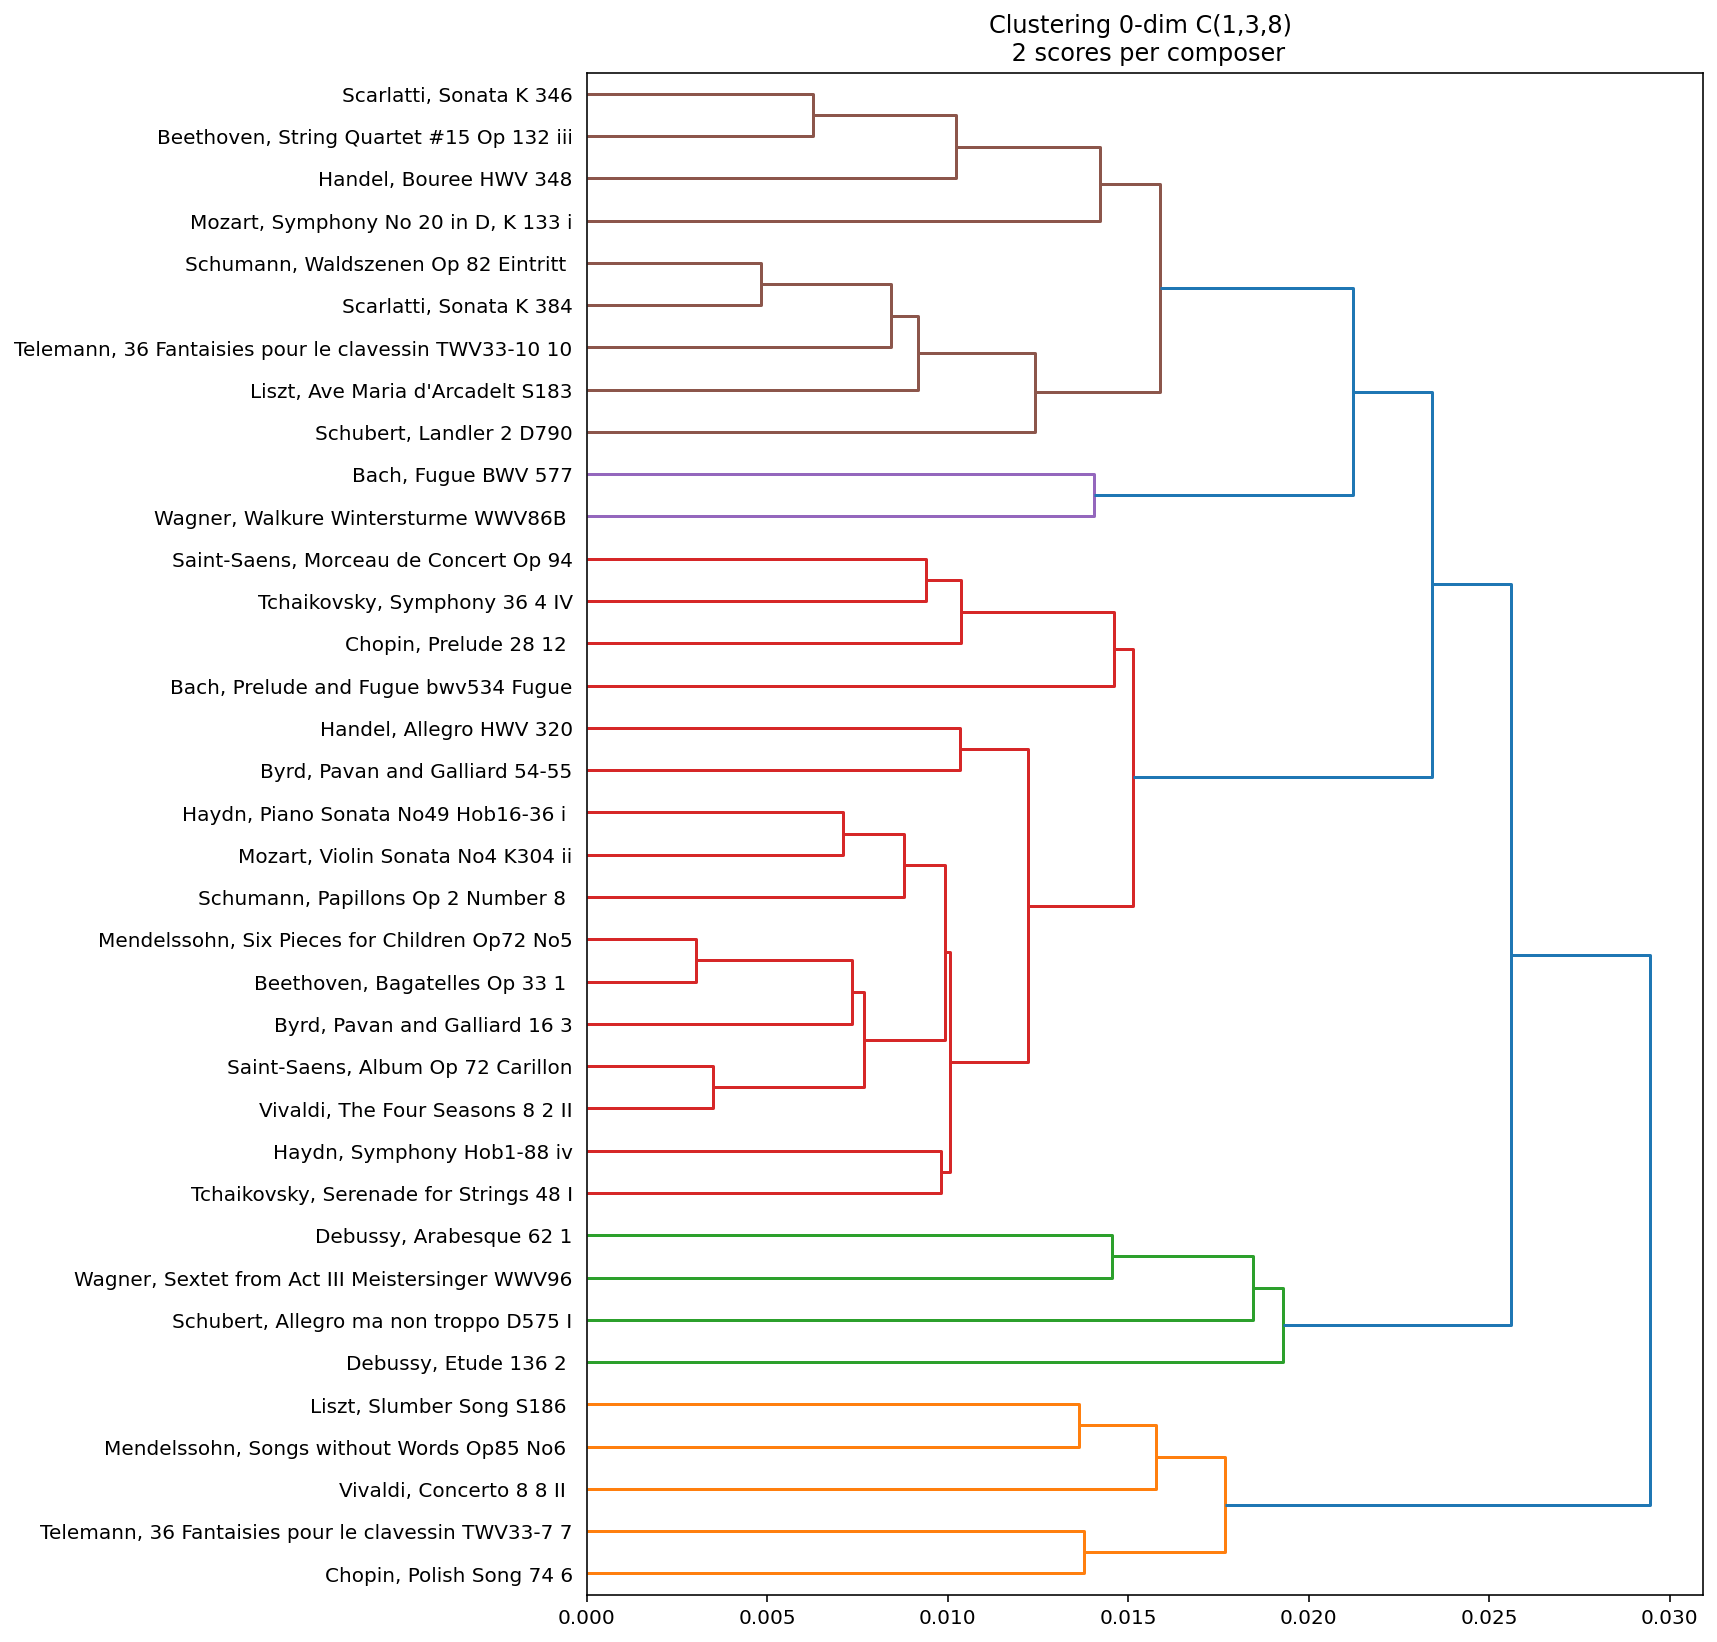

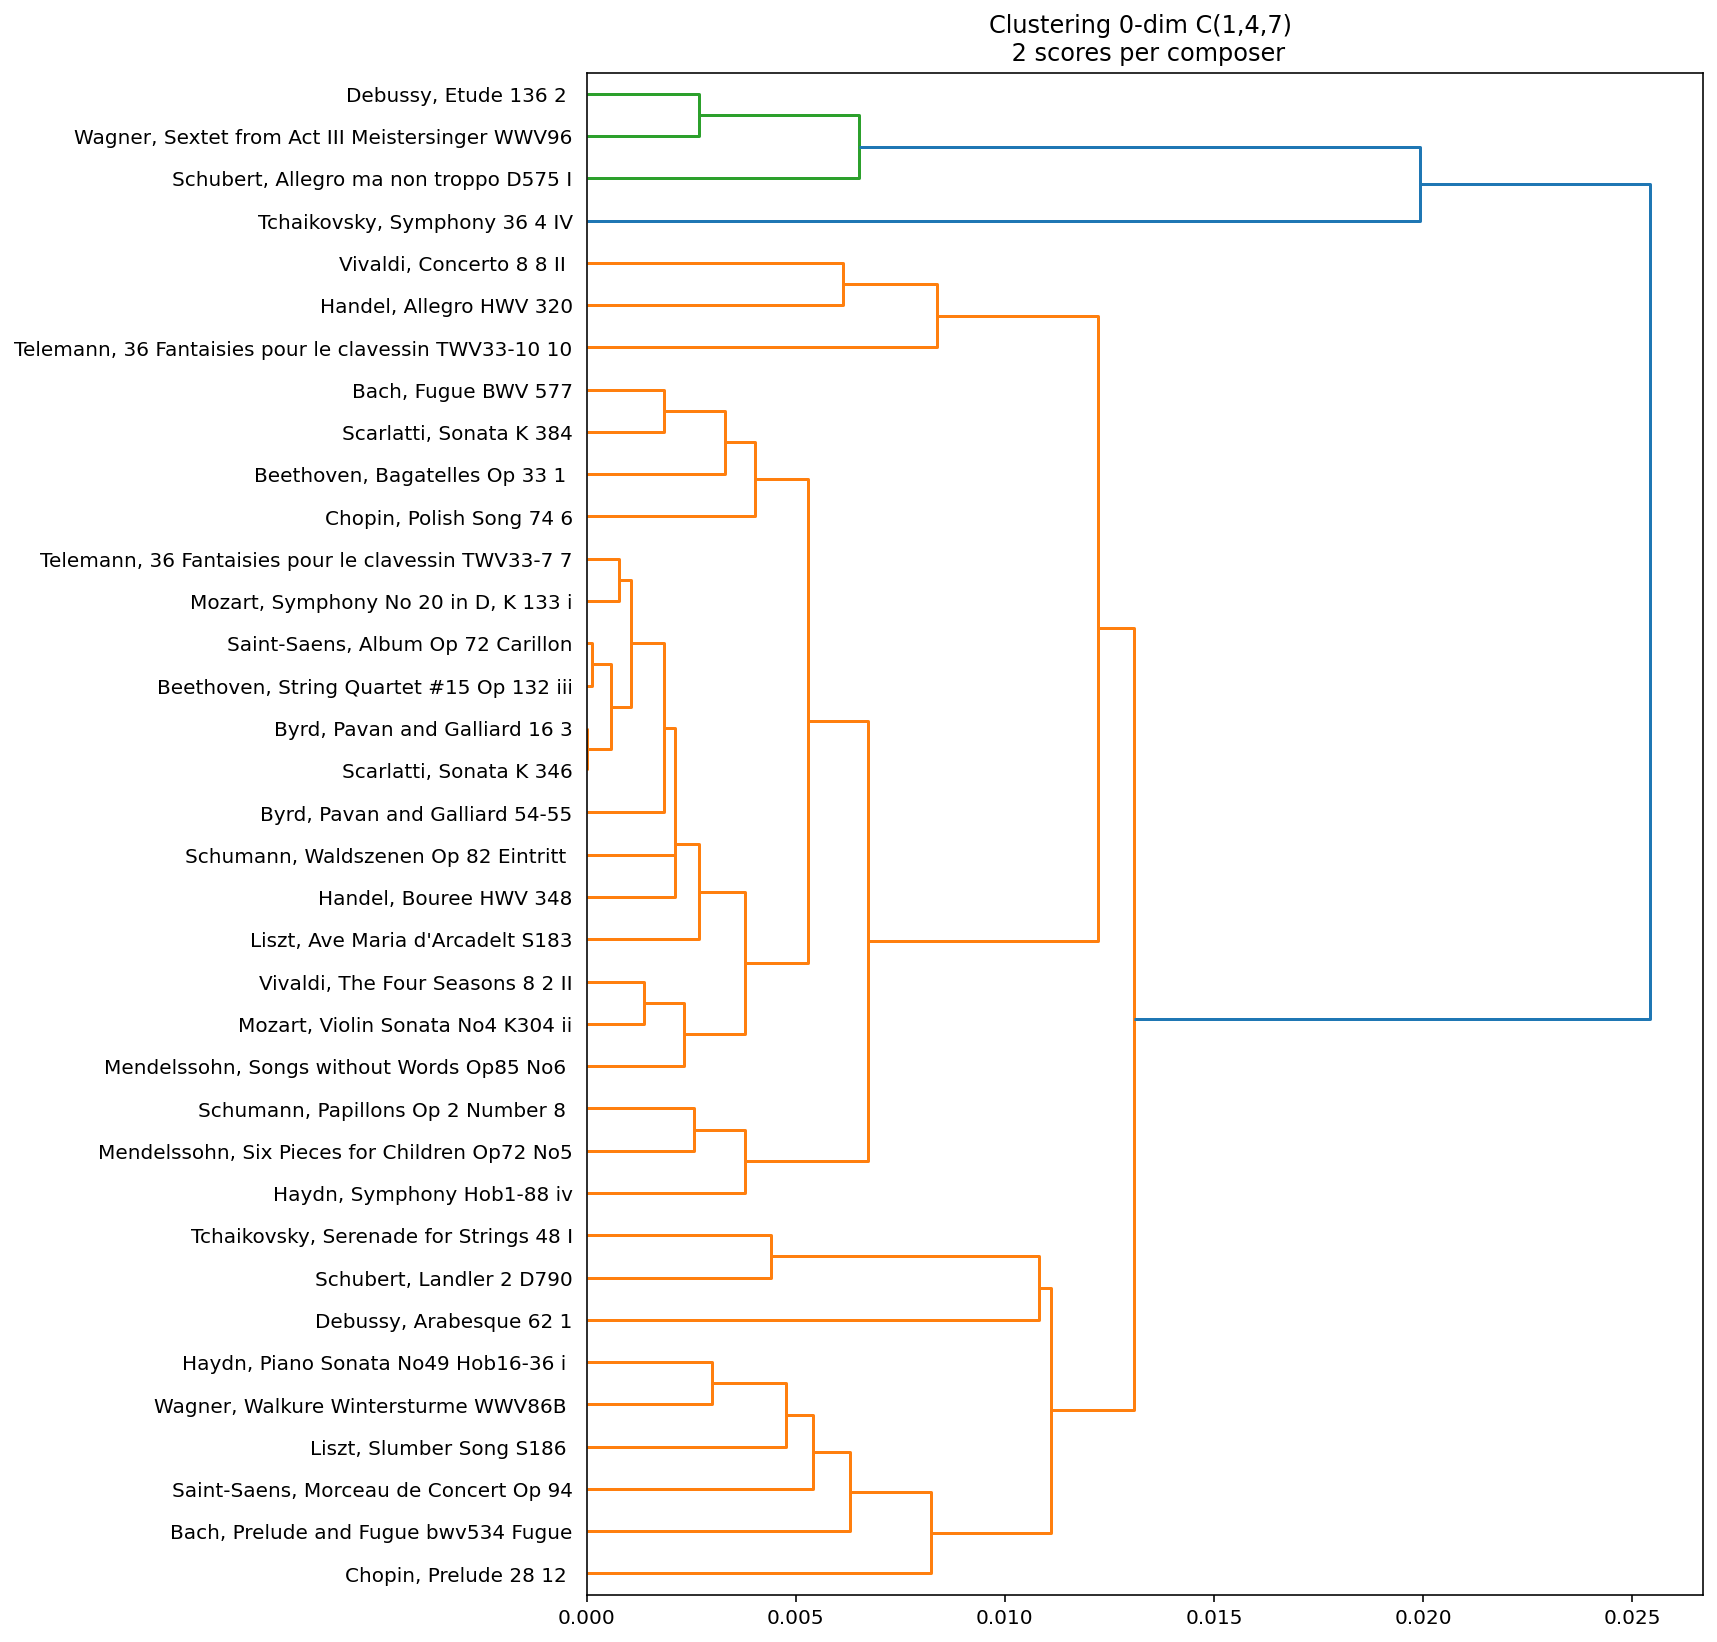

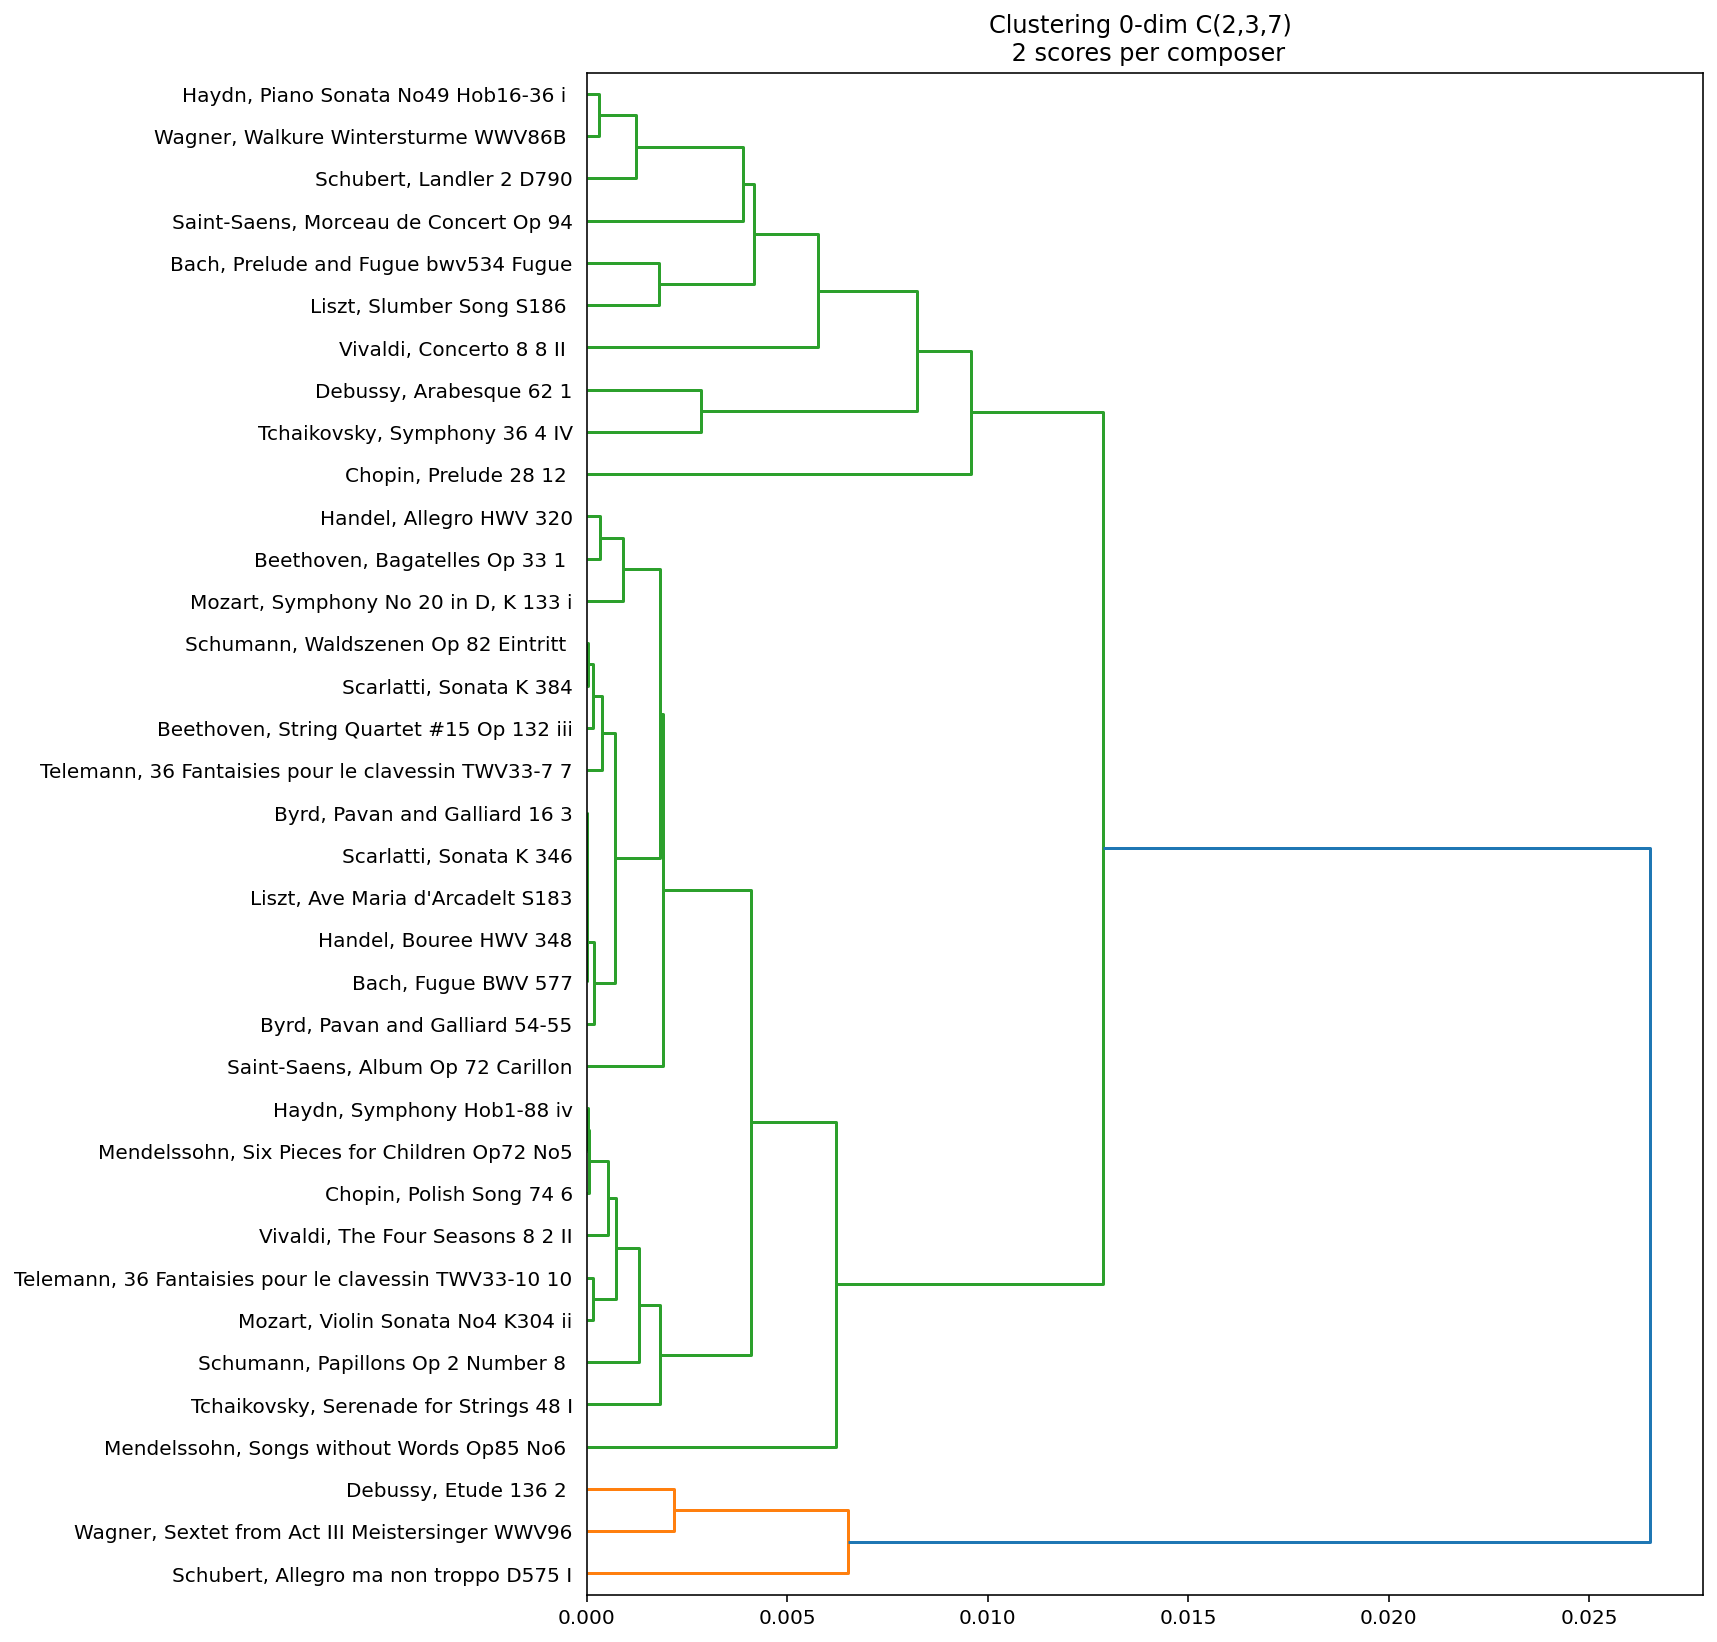

In [130]:
scores_random = []

# Choose {n_scores_for_comp} random scores for each composer
for comp in scores_composers:
    scores_random+=random.sample(scores_composers[comp], n_scores_for_comp) 

scores_random_names, dis_random = zip(*scores_random)
score_random_matrix= dict()
dimensions = [0]   # possibilities: [0], [1], [0,1]

for T,T_name in my.Torus_tonnetz:
    # compute the dissimilarity matrix in dimension 0 and 1
    score_random_matrix[T_name] = my.bottle_distance_matrix(dis_random, [0,1], T) 
    
    #for each dimension selected plot the dendogram
    for dim in dimensions:
      dendrogram_plot_dis(score_random_matrix[T_name][dim], scores_random_names, 
                          title=f"Clustering {dim}-dim {T_name} \n {n_scores_for_comp} scores per composer") 